In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

path = '..'

# import os
# os.chdir(path)

In [34]:
df = pd.read_csv(f'{path}/dataset/GetSBProfileInfoService/getOtlInfo/all.csv')

In [ ]:
tmp = pd.read_csv(f'{path}/dataset/GetSBProfileInfoService/getCsdoStatus/all.csv')

In [10]:
key=list(df.columns)

In [11]:
df = pd.merge(df, tmp, on=key, how = 'left')

In [34]:
tmp = df.groupby(['basYm', 'rprSexNm', 'rprAggrNm', 'estbYr', 'bizAreaNm', 'bizBzcCd', 'empeCntNm']).count().reset_index() # 이걸론 unique 불가능 -> 분석은 가능할 듯???

In [3]:
# 년도별 설립 확인 가능할 듯?????? -> 재무상태는 나중에 확인하고 일단 업종...
df[(df['rprSexNm']=='남성') & (df['rprAggrNm']=='30대') & (df['estbYr']==1972) & (df['bizAreaNm']=='서울특별시 서대문구')] # 3명 존재... 개인으로는 확인 불가능 같은년도에 3명....

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm
791357,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만
1781357,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만
2781357,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만
3898400,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만


In [ ]:
tmp['bizBzcCdNm'].unique() # unique가 안됨... 합칠 수 없음

array([  4,   2,   8,   3,  12,  20,   6,  16,  32,  28,  24,  40,  36,
         9,  15,   5,  48,  44,  10,  64,  52, 104,  68,  60,  56,  84,
        76,  92,  21,  14,  22,  18,  72, 108,  80, 124,  88, 100, 116,
        17,  96, 152,  30, 204, 112, 156, 136, 128, 120,  34,  11, 132,
        23,  27,  33,  26,  38,   7,  31,  39,  13,  25])

In [43]:
# 같은 동네에 같은 규모의 동일 업종이 많은듯? -> 사장 나이도 비슷....;
df['bizBzcCd'].unique()

array([47, 46, 10, 42, 56, 96, 45, 49, 86, 71, 73, 41, 95, 85, 94, 29, 76,
       55, 68, 91, 30, 20, 72, 25, 33, 16, 32, 23, 90, 35, 26, 52, 14, 59,
       58, 13, 75, 18, 28, 17, 22, 27, 15, 63, 62, 74, 24, 38, 87, 34, 31,
       37,  1, 12,  3, 50])

In [4]:
tmp = df.groupby(['basYm', 'bizAreaNm', 'bizBzcCd']).count().reset_index()

In [5]:
tmp=tmp.iloc[:, :4]

In [6]:
tmp.columns = tmp.columns[:-1].tolist() + ['count']

In [7]:
tmp

,basYm,bizAreaNm,bizBzcCd,count
0,202208,강원도 강릉시,10,236
1,202208,강원도 강릉시,41,44
2,202208,강원도 강릉시,42,380
3,202208,강원도 강릉시,45,596
4,202208,강원도 강릉시,46,884
...,...,...,...,...
16378,202406,충청북도 충주시 앙성면,56,92
16379,202406,충청북도 충주시 앙성면,76,24
16380,202406,충청북도 충주시 앙성면,85,12
16381,202406,충청북도 충주시 앙성면,86,18


In [8]:
kind_changes = tmp.pivot_table(index=['bizAreaNm', 'bizBzcCd'], columns='basYm', values='count').reset_index()

In [ ]:
# 지역별로 업종 변화 확인 가능.... 근데 다 없어진게 말이 되나...;

In [ ]:
# df[['bizBzcCd', 'bizBzcCdNm']].drop_duplicates().sort_values(by='bizBzcCd').to_csv(f'{path}/dataset/업종분류.csv', index=False)

In [9]:
kind = pd.read_csv(f'{path}/dataset/업종분류.csv')

In [10]:
kind_changes = kind_changes.merge(kind, on='bizBzcCd')

In [11]:
kind_changes
# 3개년 데이터 다 있는 데이터들 확인 필요

,bizAreaNm,bizBzcCd,202208,202306,202406,bizBzcCdNm
0,강원도 강릉시,10,236.0,NaN,NaN,식료품 제조업
1,강원도 강릉시,41,44.0,NaN,NaN,종합 건설업
2,강원도 강릉시,42,380.0,NaN,NaN,전문직별 공사업
3,강원도 강릉시,45,596.0,NaN,NaN,자동차 및 부품 판매업
4,강원도 강릉시,46,884.0,NaN,NaN,도매 및 상품 중개업
...,...,...,...,...,...,...
10167,충청북도 충주시 앙성면,56,NaN,126.0,92.0,음식점 및 주점업
10168,충청북도 충주시 앙성면,76,NaN,26.0,24.0,임대업; 부동산 제외
10169,충청북도 충주시 앙성면,85,NaN,26.0,12.0,교육 서비스업
10170,충청북도 충주시 앙성면,86,NaN,28.0,18.0,보건업


In [12]:
kind_changes['bizAreaNm'].unique()

array(['강원도 강릉시', '강원도 고성군', '강원도 동해시', '강원도 삼척시', '강원도 속초시', '강원도 양양군',
       '강원도 영월군', '강원도 원주시', '강원도 인제군', '강원도 정선군', '강원도 철원군', '강원도 춘천시',
       '강원도 태백시', '강원도 평창군', '강원도 홍천군', '강원도 화천군', '강원도 횡성군',
       '강원특별자치도 강릉시 강변로', '강원특별자치도 강릉시 교동광장로', '강원특별자치도 강릉시 연곡면',
       '강원특별자치도 고성군 현내면', '강원특별자치도 동해시 동해대로', '강원특별자치도 동해시 지양길',
       '강원특별자치도 삼척시 하장면', '강원특별자치도 속초시 농공단지길', '강원특별자치도 속초시 울산바위길',
       '강원특별자치도 양구군 방산면', '강원특별자치도 양양군 강현면', '강원특별자치도 영월군 무릉도원면',
       '강원특별자치도 원주시 귀론길', '강원특별자치도 원주시 호저면', '강원특별자치도 인제군 서화면',
       '강원특별자치도 정선군 북평면', '강원특별자치도 철원군 철원읍', '강원특별자치도 춘천시 동내면',
       '강원특별자치도 춘천시 보안길', '강원특별자치도 춘천시 사북면', '강원특별자치도 태백시 가리골길',
       '강원특별자치도 평창군 봉평면', '강원특별자치도 홍천군 서면', '강원특별자치도 화천군 상서면',
       '강원특별자치도 횡성군 서원면', '경기도 가평군', '경기도 가평군 북면', '경기도 고양시',
       '경기도 고양시 덕양구', '경기도 고양시 일산동구', '경기도 고양시 일산서구', '경기도 과천시',
       '경기도 과천시 관악산길', '경기도 광명시', '경기도 광명시 광명로', '경기도 광주시',
       '경기도 광주시 곤지암읍', '경기도 광주시 남한산성면', '경기도 구리시', '경기도 구리시 갈매순환로',
       '경기도 군포시'

In [ ]:
# 지역별로 나눠서 분석 필요 도별로 나누기

In [ ]:
kind_changes[kind_changes['bizAreaNm'] == '강원도 강릉시'] # 강릉시는 2023이후로 값이 없음... -> 다른곳도 그런 곳 있는지 확인 필요

,bizAreaNm,bizBzcCd,202208,202306,202406,bizBzcCdNm
0,강원도 강릉시,10,236.0,NaN,NaN,식료품 제조업
1,강원도 강릉시,41,44.0,NaN,NaN,종합 건설업
2,강원도 강릉시,42,380.0,NaN,NaN,전문직별 공사업
3,강원도 강릉시,45,596.0,NaN,NaN,자동차 및 부품 판매업
4,강원도 강릉시,46,884.0,NaN,NaN,도매 및 상품 중개업
5,강원도 강릉시,47,944.0,NaN,NaN,소매업; 자동차 제외
6,강원도 강릉시,49,368.0,NaN,NaN,육상 운송 및 파이프라인 운송업
7,강원도 강릉시,56,1048.0,NaN,NaN,음식점 및 주점업
8,강원도 강릉시,71,20.0,NaN,NaN,전문 서비스업
9,강원도 강릉시,73,28.0,NaN,NaN,기타 전문 과학 및 기술 서비스업


In [ ]:
# 정보가 없는건지 폐업한건지 확인 필요...

In [ ]:
kind_changes[kind_changes[202406].isna()][['bizAreaNm', 'bizBzcCd', 'bizBzcCdNm']].drop_duplicates()  # 분석 불가??

,bizAreaNm,bizBzcCd,bizBzcCdNm
0,강원도 강릉시,10,식료품 제조업
1,강원도 강릉시,41,종합 건설업
2,강원도 강릉시,42,전문직별 공사업
3,강원도 강릉시,45,자동차 및 부품 판매업
4,강원도 강릉시,46,도매 및 상품 중개업
...,...,...,...
10144,충청북도 충주시,91,스포츠 및 오락관련 서비스업
10145,충청북도 충주시,95,개인 및 소비용품 수리업
10146,충청북도 충주시,96,기타 개인 서비스업
10150,충청북도 충주시 거룡2길,26,전자 부품 컴퓨터 영상 음향 및 통신장비 제조업


In [35]:
df['지역'] = df['bizAreaNm'].apply(lambda x: x.split(' ') if len(x.split(' '))>2 else list(x.split(' '))+[' '])

In [36]:
df['지역_도'] = df['지역'].apply(lambda x: x[0])

In [37]:
df['지역_시'] = df['지역'].apply(lambda x: x[1])

In [38]:
df['지역_세부'] = df['지역'].apply(lambda x: x[2] if len(x)>2 else None)

In [ ]:
df # 도별로 우세업종 확인

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,지역,지역_도,지역_시,지역_세부
0,202208,남성,60대,2003,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, ]",강원도,강릉시,
1,202208,남성,60대,1999,강원도 강릉시,47,소매업; 자동차 제외,0명,"[강원도, 강릉시, ]",강원도,강릉시,
2,202208,여성,40대,2018,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, ]",강원도,강릉시,
3,202208,남성,50대,2017,강원도 강릉시,47,소매업; 자동차 제외,0명,"[강원도, 강릉시, ]",강원도,강릉시,
4,202208,여성,40대,2000,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, ]",강원도,강릉시,
...,...,...,...,...,...,...,...,...,...,...,...,...
4224081,202406,남성,50대,2017,충청북도 충주시 앙성면,49,육상 운송 및 파이프라인 운송업,0명,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면
4224082,202406,여성,50대,2019,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면
4224083,202406,남성,30대,2021,충청북도 충주시 앙성면,47,소매업; 자동차 제외,0명,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면
4224084,202306,남성,60대,2000,충청북도 충주시 앙성면,46,도매 및 상품 중개업,5명 이상 10명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면


In [44]:
df_dg = df[df['지역_도']=='대구광역시']

In [74]:
# 고용인에 따른 사업장 규모 정의 필요(법령확인?)
# 지역별 사업자 연령파악??????? 의미가..????????????????
df_dg.to_csv(f"{path}/dataset/대구_raw.csv", index=False)

In [55]:
cols = list(df_dg.columns)

In [63]:
tmp = df_dg[cols[:4] + cols[5:8] + ['지역_시']]
tmp['count'] = 1

C:\Users\Pro\AppData\Local\Temp\ipykernel_14576\1547281281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['count'] = 1


In [67]:
tmp.groupby(list(tmp.columns)[:-1]).count().reset_index().to_csv(f'{path}/dataset/대구구별사업자.csv', index=False)

In [ ]:
tmp.groupby(['basYm', 'bizBzcCd', 'bizBzcCdNm'])

,basYm,rprSexNm,rprAggrNm,estbYr,bizBzcCd,bizBzcCdNm,empeCntNm,지역_시,count
525336,202406,남성,60대,2001,46,도매 및 상품 중개업,5명 이상 10명 미만,군위군,1
525337,202306,남성,60대,2005,46,도매 및 상품 중개업,1명 이상 5명 미만,군위군,1
525338,202306,남성,60대,2006,46,도매 및 상품 중개업,10명 이상 30명 미만,군위군,1
525339,202306,남성,60대,2007,46,도매 및 상품 중개업,0명,군위군,1
525340,202306,여성,60대,2013,56,음식점 및 주점업,0명,군위군,1
...,...,...,...,...,...,...,...,...,...
3695631,202406,남성,50대,2016,49,육상 운송 및 파이프라인 운송업,0명,중구,1
3695632,202406,여성,50대,2015,45,자동차 및 부품 판매업,0명,중구,1
3695633,202406,여성,50대,2014,56,음식점 및 주점업,0명,중구,1
3695634,202406,남성,30대,2019,56,음식점 및 주점업,0명,중구,1


In [70]:
tmp = tmp.pivot_table(index=['rprSexNm', 'rprAggrNm', 'estbYr', 'bizBzcCd', 'bizBzcCdNm', 'empeCntNm', '지역_시'], columns='basYm', values='count', aggfunc='sum').reset_index()

In [72]:
tmp.to_csv(f'{path}/dataset/대구연도별사업자.csv', index=False)

In [ ]:
# 연도별 창업 업종 확인 가능할듯? -> 유행이 있었나 확인가능 혹은 그냥 창업?
tmp

basYm,rprSexNm,rprAggrNm,estbYr,bizBzcCd,bizBzcCdNm,empeCntNm,지역_시,202208,202306,202406
0,남성,30대,1987,29,기타 기계 및 장비 제조업,0명,북구,4.0,4.0,4.0
1,남성,30대,1997,46,도매 및 상품 중개업,10명 이상 30명 미만,달서구,NaN,4.0,4.0
2,남성,30대,1998,46,도매 및 상품 중개업,0명,중구,4.0,NaN,NaN
3,남성,30대,1998,46,도매 및 상품 중개업,5명 이상 10명 미만,중구,4.0,8.0,NaN
4,남성,30대,2002,30,자동차 및 트레일러 제조업,5명 이상 10명 미만,북구,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...
17127,여성,70대,2019,56,음식점 및 주점업,0명,중구,4.0,4.0,NaN
17128,여성,70대,2019,56,음식점 및 주점업,1명 이상 5명 미만,북구,NaN,4.0,4.0
17129,여성,70대,2020,56,음식점 및 주점업,1명 이상 5명 미만,수성구,4.0,NaN,NaN
17130,여성,70대,2021,56,음식점 및 주점업,0명,수성구,NaN,NaN,4.0


In [ ]:
tmp[tmp['bizBzcCd']==56][['지역_시', 202208, 202306, 202406]].groupby('지역_시').sum().reset_index()

basYm,지역_시,202208,202306,202406
0,군위군,0.0,28.0,32.0
1,남구,560.0,628.0,544.0
2,달서구,2172.0,2244.0,2092.0
3,달성군,1172.0,1140.0,1016.0
4,동구,1312.0,1364.0,1268.0
5,북구,1804.0,1740.0,1432.0
6,서구,668.0,700.0,648.0
7,수성구,1484.0,1624.0,1408.0
8,중구,940.0,1008.0,928.0


In [80]:
restaurant=tmp[tmp['bizBzcCd']==56][['지역_시',	202208,	202306,	202406]].groupby('지역_시').sum().reset_index()

In [92]:
restaurant = restaurant.melt(id_vars=['지역_시'], value_vars=[202208, 202306, 202406], var_name='기간', value_name='값')

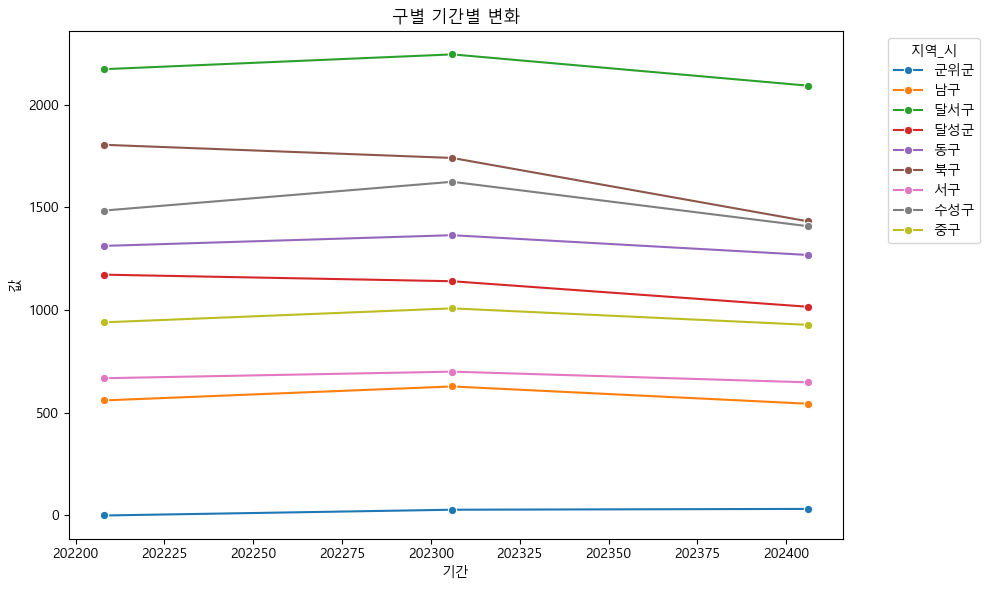

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=restaurant, x='기간', y='값', hue='지역_시', marker='o')

# 제목 및 레이블 설정
plt.title('구별 기간별 변화')
plt.xlabel('기간')
plt.ylabel('값')
plt.legend(title='지역_시', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

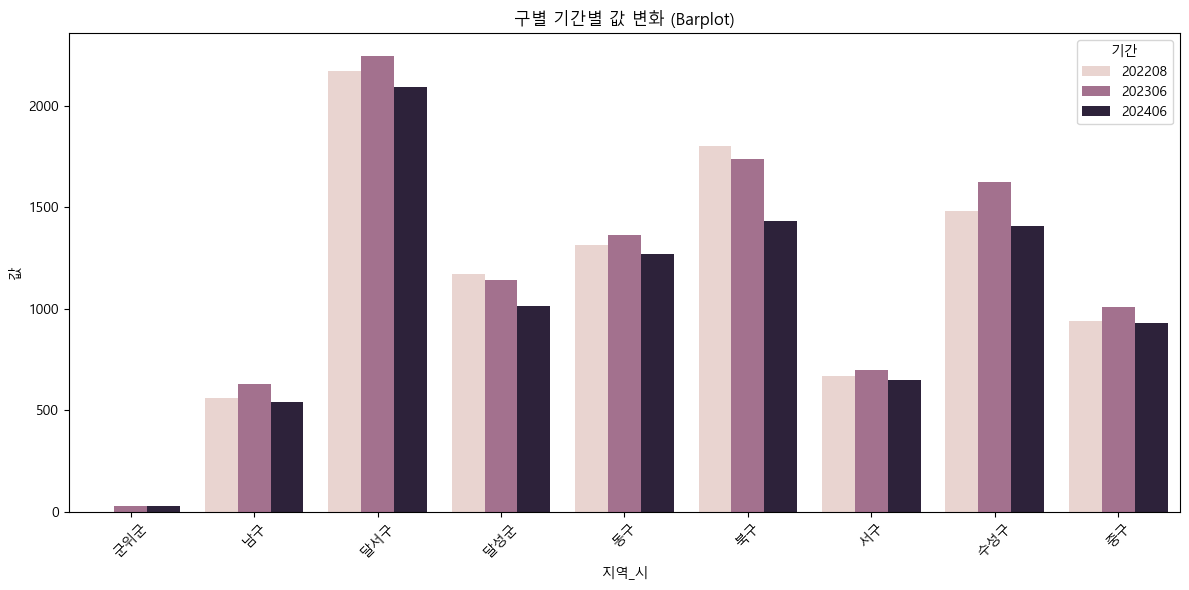

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(data=restaurant, x='지역_시', y='값', hue='기간')

# 제목 및 레이블 설정
plt.title('구별 기간별 값 변화 (Barplot)')
plt.xlabel('지역_시')
plt.ylabel('값')
plt.xticks(rotation=45)  # x축 레이블 회전

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
# 업종, 지역별로